# Simple Moving average cross over 

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# creating a strategy on the 1991 to 2023 data of apple 
data = yf.download("AAPL",start = "1991-01-01")
data = data.Close.to_frame()
data 

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1991-01-02,0.388393
1991-01-03,0.383929
1991-01-04,0.386161
1991-01-07,0.386161
1991-01-08,0.386161
...,...
2023-07-12,189.770004
2023-07-13,190.539993
2023-07-14,190.690002


In [3]:
# Creating two moving averages 
sma_s  = 50 
sma_l = 100

In [4]:
data["SMA_s"] = data.Close.rolling(sma_s).mean()
data["SMA_l"] = data.Close.rolling(sma_l).mean()

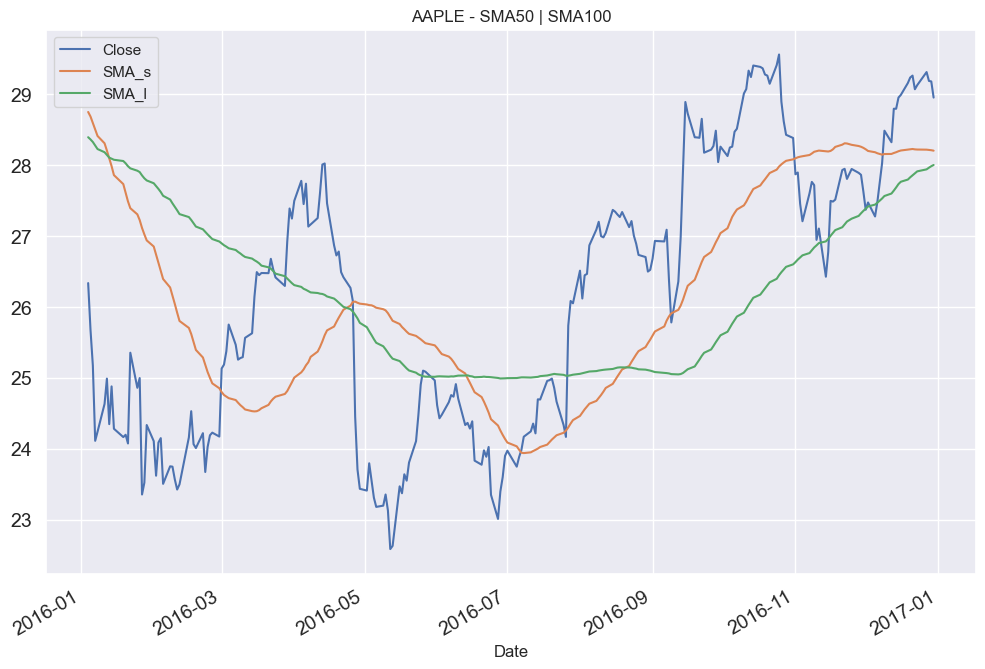

In [5]:
# For a specified year 

sns.set()
data.loc["2016"].plot(figsize=(12,8),title="AAPLE - SMA{} | SMA{}".format(sma_s,sma_l),fontsize=14)
plt.show()

# Going long and short bias together 

In [13]:
# Droping the na value 
data.dropna(inplace = True)

In [17]:
# taking the position it is only taken when long term SMA is less than SMA small
data["Position"] = np.where(data["SMA_s"]>data["SMA_l"],1,-1)
data

,Close,SMA_s,SMA_l,Position
Date,,,,
1991-05-23,0.402902,0.534420,0.513326,1
1991-05-24,0.409598,0.530960,0.513538,1
1991-05-28,0.410714,0.527344,0.513806,1
1991-05-29,0.419643,0.523638,0.514141,1
1991-05-30,0.425223,0.519732,0.514531,1
...,...,...,...,...
2023-07-07,190.679993,178.715600,167.914600,1
2023-07-10,188.610001,179.212600,168.262200,1
2023-07-11,188.080002,179.606000,168.611000,1


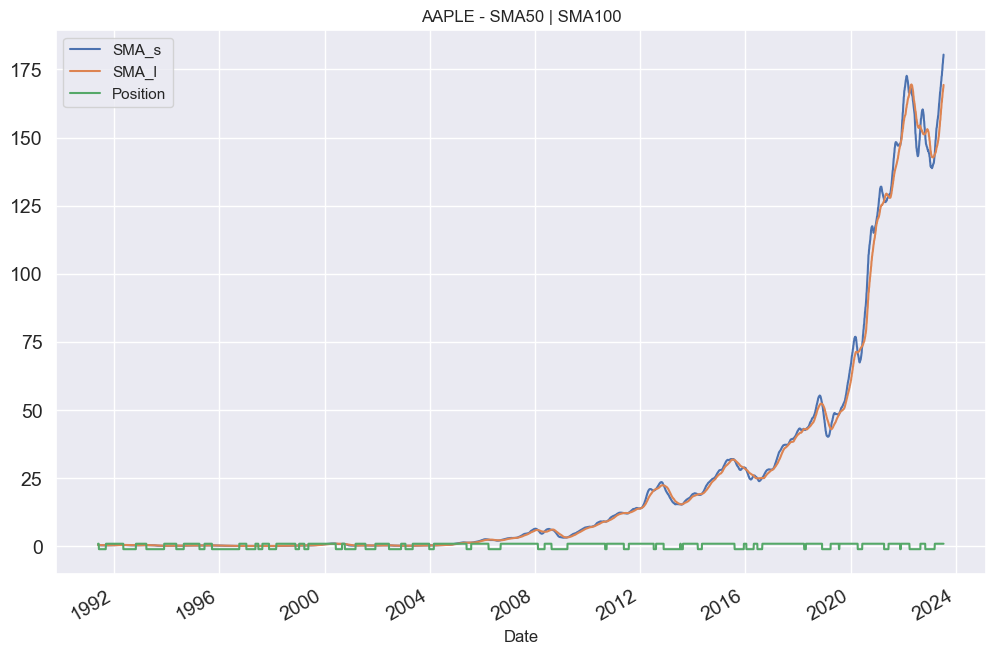

In [18]:
# For specified columns
sns.set()
data.loc[:,["SMA_s","SMA_l","Position"]].plot(figsize=(12,8),title="AAPLE - SMA{} | SMA{}".format(sma_s,sma_l),fontsize=14)
plt.show()

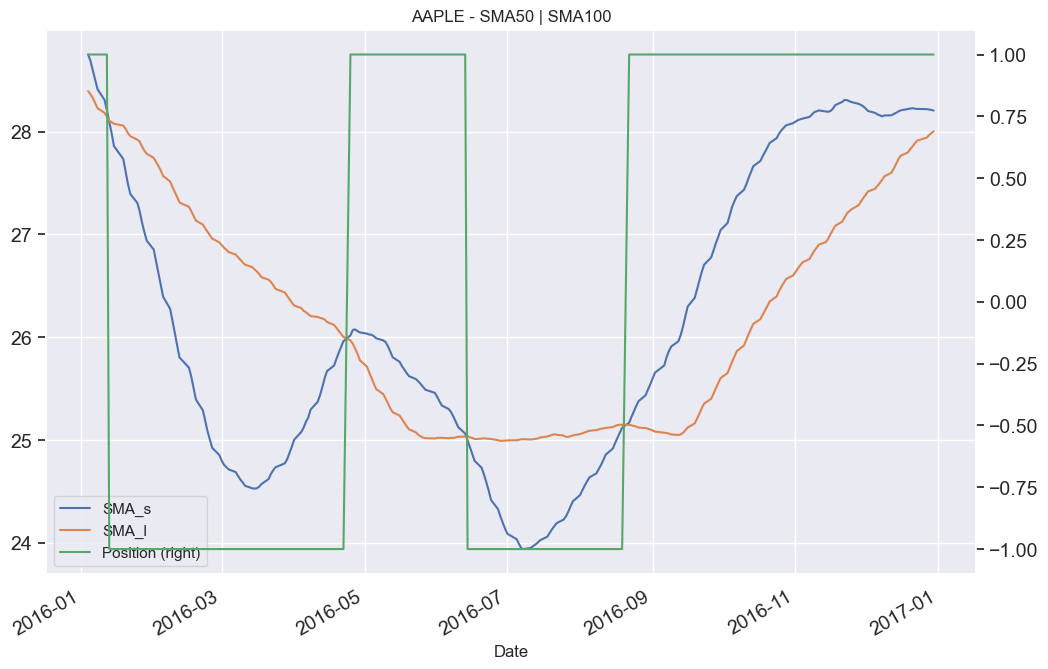

In [21]:
# For specified columns and for a year 
sns.set()
data.loc["2016",["SMA_s","SMA_l","Position"]].plot(figsize=(12,8),title="AAPLE - SMA{} | SMA{}".format(sma_s,sma_l),fontsize=14,secondary_y="Position")
plt.show()

# Buy and Hold 

In [22]:
data["returnsb&h"] = np.log(data.Close.div(data.Close.shift(1)))

In [25]:
data["strategy"] = data["returnsb&h"]*data.Position.shift(1)

In [26]:
data.dropna()

,Close,SMA_s,SMA_l,Position,returnsb&h,strategy
Date,,,,,,
1991-05-24,0.409598,0.530960,0.513538,1,0.016483,0.016483
1991-05-28,0.410714,0.527344,0.513806,1,0.002721,0.002721
1991-05-29,0.419643,0.523638,0.514141,1,0.021507,0.021507
1991-05-30,0.425223,0.519732,0.514531,1,0.013209,0.013209
1991-05-31,0.419643,0.516027,0.514866,1,-0.013209,-0.013209
...,...,...,...,...,...,...
2023-07-07,190.679993,178.715600,167.914600,1,-0.005909,-0.005909
2023-07-10,188.610001,179.212600,168.262200,1,-0.010915,-0.010915
2023-07-11,188.080002,179.606000,168.611000,1,-0.002814,-0.002814


In [27]:
# Calculate the absolute sum
data[["returnsb&h","strategy"]].sum()

returnsb&h    6.158924
strategy      2.197165
dtype: float64

** seeing above strategy will not give the correct idea we have to see the drawdowns**

In [29]:
data[["returnsb&h","strategy"]].sum().apply(np.exp) # What 1$ will be 

returnsb&h    472.918948
strategy        8.999460
dtype: float64

In [37]:
data[["returnsb&h","strategy"]].std()*np.sqrt(252)

returnsb&h    0.437472
strategy      0.437618
dtype: float64

## Strategy adjusted with long bias 

In [30]:
data["Position2"] = np.where(data["SMA_s"]>data["SMA_l"],1,0)
data["strategy2"] = data["returnsb&h"]*data.Position2.shift(1)

In [31]:
data.dropna()

,Close,SMA_s,SMA_l,Position,returnsb&h,strategy,Position2,strategy2
Date,,,,,,,,
1991-05-24,0.409598,0.530960,0.513538,1,0.016483,0.016483,1,0.016483
1991-05-28,0.410714,0.527344,0.513806,1,0.002721,0.002721,1,0.002721
1991-05-29,0.419643,0.523638,0.514141,1,0.021507,0.021507,1,0.021507
1991-05-30,0.425223,0.519732,0.514531,1,0.013209,0.013209,1,0.013209
1991-05-31,0.419643,0.516027,0.514866,1,-0.013209,-0.013209,1,-0.013209
...,...,...,...,...,...,...,...,...
2023-07-07,190.679993,178.715600,167.914600,1,-0.005909,-0.005909,1,-0.005909
2023-07-10,188.610001,179.212600,168.262200,1,-0.010915,-0.010915,1,-0.010915
2023-07-11,188.080002,179.606000,168.611000,1,-0.002814,-0.002814,1,-0.002814


In [32]:
data[["returnsb&h","strategy2"]].sum()

returnsb&h    6.158924
strategy2     4.178044
dtype: float64

In [33]:
data[["returnsb&h","strategy2"]].sum().apply(np.exp) # What 1$ will be 

returnsb&h    472.918948
strategy2      65.238142
dtype: float64

In [35]:
data[["returnsb&h","strategy2"]].std()*np.sqrt(252)

returnsb&h    0.437472
strategy2     0.338096
dtype: float64

**Conlusion**

we thus reduces the risk in startegy2 and taking long bias able to get the better return as compared to going long and short together 

In [38]:
data[["strategy","strategy2"]].std()*np.sqrt(252)

strategy     0.437618
strategy2    0.338096
dtype: float64

## Find the best SMA for the top 5 stocks 
## Create a bias startegy 
## Compare the drawdowns 
## pick the best 3 stocks for your portfolio